In [2]:
#imports
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torchvision import utils
from torch.utils.data import DataLoader
from torch import nn
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from torchvision.models import vgg16
from tqdm import tqdm
import time
import os
import seaborn as sns
from torch.nn import functional as F

In [3]:
#dataset of choice for binary classification
#Out:['test','train']
os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/')

['test', 'train']

In [4]:
#Out:['muffin','chihuahua']
os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/')

['muffin', 'chihuahua']

In [5]:
'''
Out:
['img_4_879.jpg',
 'img_4_684.jpg',
 'img_2_980.jpg',
 'img_1_838.jpg',
 'img_0_340.jpg']
'''
os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/muffin/')[0:5]

['img_4_879.jpg',
 'img_4_684.jpg',
 'img_2_980.jpg',
 'img_1_838.jpg',
 'img_0_340.jpg']

In [6]:
'''
Out:
['img_0_746.jpg',
 'img_1_1221.jpg',
 'img_3_835.jpg',
 'img_0_123.jpg',
 'img_0_919.jpg']
'''
os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/chihuahua/')[0:5]

['img_0_746.jpg',
 'img_1_1221.jpg',
 'img_3_835.jpg',
 'img_0_123.jpg',
 'img_0_919.jpg']

In [7]:
train_chih = pd.DataFrame({'img':os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/chihuahua/'),
                           'label':[0]*len(os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/chihuahua/'))})
                           
                           
train_muff = pd.DataFrame({'img':os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/muffin/'),
                           'label':[1]*len(os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/train/muffin/'))})

val_chih = pd.DataFrame({'img':os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua/'),
                           'label':[0]*len(os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/test/chihuahua/'))})
                           
                           
val_muff = pd.DataFrame({'img':os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/'),
                           'label':[1]*len(os.listdir('/kaggle/input/muffin-vs-chihuahua-image-classification/test/muffin/'))})

In [8]:
train_muff[train_muff['img']=='img_0_1071.jpg']


,img,label
1309,img_0_1071.jpg,1


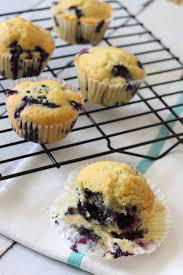

In [9]:
Image.open('/kaggle/input/muffin-vs-chihuahua-image-classification/train/muffin/img_0_1071.jpg')

In [10]:
train_chih.head(2)

,img,label
0,img_0_746.jpg,0
1,img_1_1221.jpg,0


In [11]:
val_chih.head(2)

,img,label
0,img_4_684.jpg,0
1,img_0_340.jpg,0


In [12]:
val_muff.head(2)

,img,label
0,img_3_835.jpg,1
1,img_2_138.jpg,1


In [13]:
train_muff.head(2)

,img,label
0,img_4_879.jpg,1
1,img_4_684.jpg,1


In [14]:
'''
Out:
 len train_chih: 2559 
 len train_muff: 2174 

 2 examples from train_chih:
               img  label
0   img_0_746.jpg      0
1  img_1_1221.jpg      0 

 2 examples from train_muff:
              img  label
0  img_4_879.jpg      1
1  img_4_684.jpg      1
'''
print(' len train_chih:',len(train_chih),'\n',
      'len train_muff:',len(train_muff),'\n')
print(' 2 examples from train_chih:\n',train_chih.head(2),'\n\n',
     '2 examples from train_muff:\n',train_muff.head(2))

 len train_chih: 2559 
 len train_muff: 2174 

 2 examples from train_chih:
               img  label
0   img_0_746.jpg      0
1  img_1_1221.jpg      0 

 2 examples from train_muff:
              img  label
0  img_4_879.jpg      1
1  img_4_684.jpg      1


In [15]:
'''
Out:
 len train_chih: 640 
 len train_muff: 544 

 2 examples from train_chih:
              img  label
0  img_4_684.jpg      0
1  img_0_340.jpg      0 

 2 examples from train_muff:
              img  label
0  img_3_835.jpg      1
1  img_2_138.jpg      1
'''
print(' len train_chih:',len(val_chih),'\n',
      'len train_muff:',len(val_muff),'\n')
print(' 2 examples from train_chih:\n',val_chih.head(2),'\n\n',
     '2 examples from train_muff:\n',val_muff.head(2))

 len train_chih: 640 
 len train_muff: 544 

 2 examples from train_chih:
              img  label
0  img_4_684.jpg      0
1  img_0_340.jpg      0 

 2 examples from train_muff:
              img  label
0  img_3_835.jpg      1
1  img_2_138.jpg      1


In [16]:
train_muff[train_muff['img']=='1_img_0_1071.jpg']

,img,label


In [17]:

train_chih[train_chih['img']=='1_img_0_1071.jpg']

,img,label


In [18]:
df = pd.concat([train_chih,train_muff]).sort_values(by=['img'], ignore_index=True)
df

,img,label
0,img_0_0.jpg,0
1,img_0_1.jpg,0
2,img_0_10.jpg,0
3,img_0_100.jpg,0
4,img_0_100.jpg,1
...,...,...
4728,img_4_997.jpg,0
4729,img_4_998.jpg,0
4730,img_4_998.jpg,1
4731,img_4_999.jpg,1


In [19]:
df_val = pd.concat([val_chih,val_muff]).sort_values(by=['img'], ignore_index=True)
df_val

,img,label
0,img_0_0.jpg,1
1,img_0_10.jpg,1
2,img_0_1000.jpg,1
3,img_0_1037.jpg,1
4,img_0_105.jpg,1
...,...,...
1179,img_4_979.jpg,1
1180,img_4_989.jpg,1
1181,img_4_991.jpg,1
1182,img_4_996.jpg,1


In [20]:
'''
Out:
54.07% of images with label 0/chihuahua
45.93% of images with label 1/muffin
'''
print(f"{int(df[df['label']==0]['label'].count())*100/len(df):.2f}% of images with label 0/chihuahua")
print(f"{int(df[df['label']==1]['label'].count())*100/len(df):.2f}% of images with label 1/muffin")

54.07% of images with label 0/chihuahua
45.93% of images with label 1/muffin


In [21]:
'''
Out:
54.05% of images with label 0/chihuahua
45.95% of images with label 1/muffin
'''
print(f"{int(df_val[df_val['label']==0]['label'].count())*100/len(df_val):.2f}% of images with label 0/chihuahua")
print(f"{int(df_val[df_val['label']==1]['label'].count())*100/len(df_val):.2f}% of images with label 1/muffin")

54.05% of images with label 0/chihuahua
45.95% of images with label 1/muffin


In [22]:
print(f'{df.duplicated().sum()} duplicates in train df')
print(f'{df_val.duplicated().sum()} duplicates in valid df')

0 duplicates in train df
0 duplicates in valid df


In [23]:
def draw_batch_imgs(img_names ,class_name ,nrows = 2 ,ncols = 2, fsize = (10,6), imgpath = '/kaggle/input/muffin-vs-chihuahua-image-classification/',data_type='train'):
    f, axarr = plt.subplots(nrows ,ncols ,figsize=fsize)

    for i ,j in enumerate(img_names[:nrows*ncols]):
        fname = os.path.join(imgpath,data_type ,class_name ,j)
        img = Image.open(fname)
        plt.subplot(nrows, ncols, i+1) 
        plt.imshow(np.array(img))
        plt.axis('off')
        
    plt.suptitle(class_name, y=0.94)

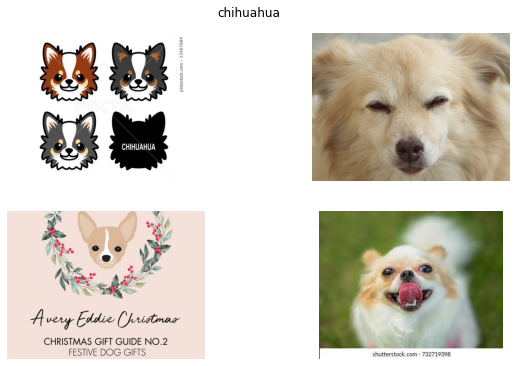

In [24]:
draw_batch_imgs(train_chih['img'],'chihuahua')

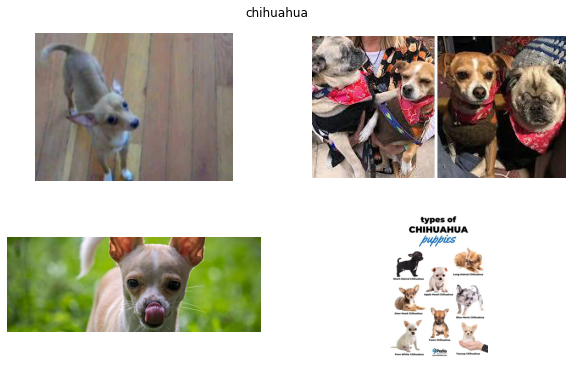

In [25]:
draw_batch_imgs(val_chih['img'], 'chihuahua', data_type='test')

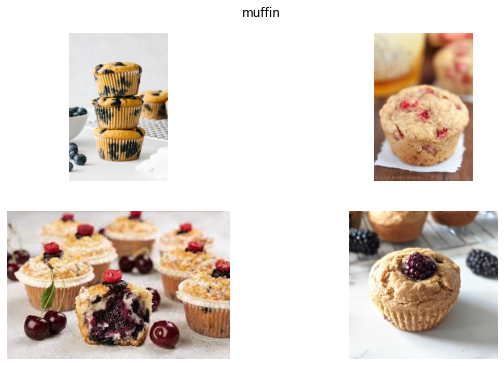

In [26]:
draw_batch_imgs(train_muff['img'],'muffin')

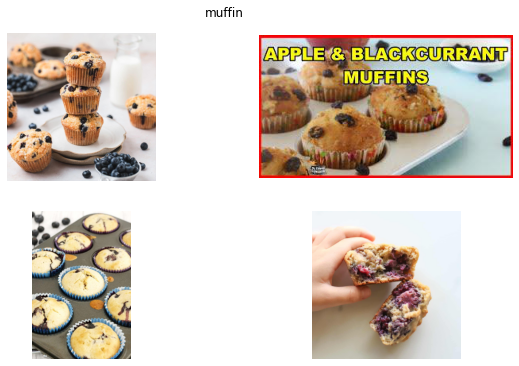

In [27]:
draw_batch_imgs(val_muff['img'], 'muffin', data_type='test')

In [28]:
imgpath = '/kaggle/input/muffin-vs-chihuahua-image-classification/'

class ChihMufDset(Dataset):
    def __init__(self, imgs, labels, transform, data_type="train"):
        self.labels = labels
        self.imgs = imgs
        self.transform = transform
        self.data_type = data_type
        
    def __len__(self):
            return len(self.labels)

    def __getitem__(self, idx):
            label = self.labels[idx]
            if label:
                img = Image.open(os.path.join(imgpath ,self.data_type ,'muffin' ,self.imgs[idx]))
            else:
                img = Image.open(os.path.join(imgpath ,self.data_type ,'chihuahua' ,self.imgs[idx]))
            img = img.convert("RGB")
            img = self.transform(img)

            return {'img':img,'label':label}

In [29]:
def get_width_height(df_test, path = '/kaggle/input/muffin-vs-chihuahua-image-classification/', data_type = 'train'):
    for index, row in df_test.iterrows():
        if row['label'] == 0:
            img = Image.open(os.path.join(path, data_type, 'chihuahua', row['img']))
        else:
            img = Image.open(os.path.join(path, data_type, 'muffin', row['img']))
        width, height = img.size
        df_test.loc[index,'width'] = width
        df_test.loc[index,'height'] = height
    df_test["ratio"] = round(df_test["width"] / df_test["height"], 2)

In [30]:
df_test = df.copy()
get_width_height(df_test)

In [31]:
df_test['width'].describe()

count    4733.000000
mean      756.972111
std       546.499994
min       102.000000
25%       281.000000
50%       640.000000
75%      1080.000000
max      4603.000000
Name: width, dtype: float64

In [32]:
df_test['height'].describe()

count    4733.000000
mean      730.885696
std       554.782440
min       129.000000
25%       275.000000
50%       596.000000
75%      1001.000000
max      4032.000000
Name: height, dtype: float64

In [33]:
df_test["ratio"] = round(df_test["width"] / df_test["height"], 2)

In [34]:
df_test['ratio'].describe()

count    4733.000000
mean        1.127078
std         0.391432
min         0.260000
25%         0.750000
50%         1.000000
75%         1.500000
max         3.020000
Name: ratio, dtype: float64

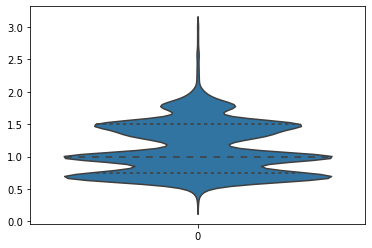

In [35]:
sns.violinplot(data = df_test['ratio'], inner = 'quartile');

Text(0, 0.5, 'Height')

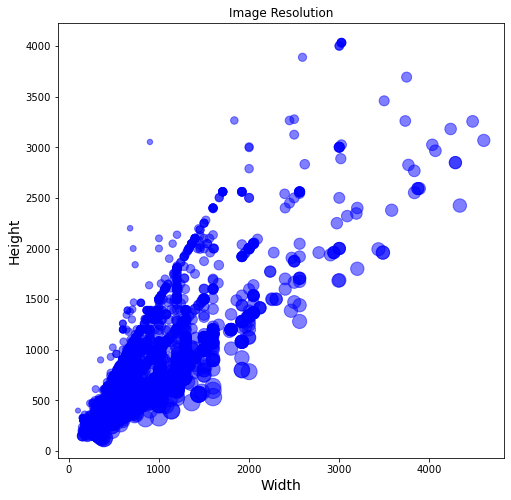

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(df_test['width'], df_test['height'], color='blue', alpha=0.5, s=df_test["ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [37]:
df_test = df_test[df_test['width']<=800]

Text(0, 0.5, 'Height')

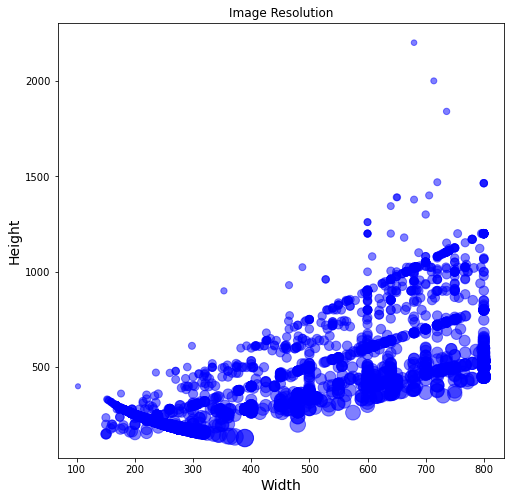

In [38]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(df_test['width'], df_test['height'], color='blue', alpha=0.5, s=df_test["ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

WIDTH:<br>
count    4733.000000<br>
mean      756.972111<br>
std       546.499994<br>
min       102.000000<br>
25%       281.000000<br>
50%       640.000000<br>
75%      1080.000000<br>
max      4603.000000<br>
Name: width, dtype: float64<br>
HEIGHT:<br>
count    4733.000000<br>
mean      730.885696<br>
std       554.782440<br>
min       129.000000<br>
25%       275.000000<br>
50%       596.000000<br>
75%      1001.000000<br>
max      4032.000000<br>
Name: height, dtype: float64<br>
<br>

Test research on the optimal image size as the input for the image, in this example it seems to be  around 600-640 for both height and width. For the sake of simplicity of model and being able to train it in managable time, I'm gonna choose 224 as initial value to start training and use VGG16 pretrained model to fine tune it for this problem and increase size as I get an opportunity to do so, or maybe try better resolution in different project. But optimal resolution size is something to be aware of for the optimal result

In [39]:
preprocess_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomRotation(90),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
preprocess_valid = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [40]:
train_ds = ChihMufDset(df['img'], df['label'], data_type = 'train', transform = preprocess_train)
valid_ds = ChihMufDset(df_val['img'], df_val['label'], data_type = 'test', transform = preprocess_valid)

In [43]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [44]:
train_loader = DataLoader(train_ds,
                          batch_size=64,
                          shuffle=True,
                          pin_memory=True if DEVICE == "cuda" else False)

val_loader = DataLoader(valid_ds,
                        batch_size=64,
                        shuffle=False,
                        pin_memory=True if DEVICE == "cude" else False)

In [45]:
#df - dataframe with img|label columns.
#transform - transforms to apply on images
#k - number of random images to display
#path to the project
#data_type - data structured /project_name/train /project_name/test/

def plot_transformed_images(df, transform, k=3, data_type = 'train', path = '/kaggle/input/muffin-vs-chihuahua-image-classification/'):
    df_plot = df.sample(n = k)
    for index, row in df_plot.iterrows():
        if row['label'] == 0:
            label = 'chihuahua'
        else:
            label = 'muffin'
        img_path = os.path.join(path, data_type, label, row['img'])
        #print(path)
        with Image.open(img_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {label}", fontsize=16)

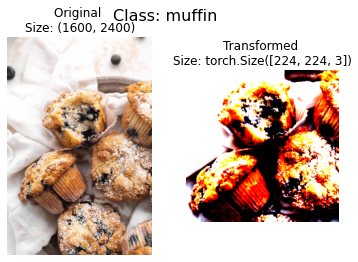

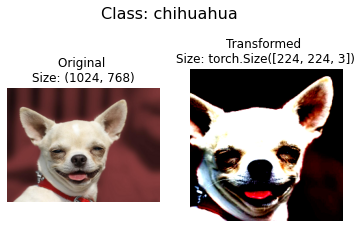

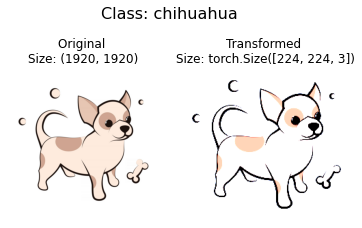

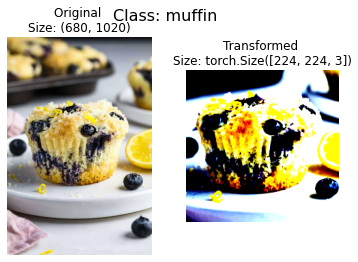

In [46]:
plot_transformed_images(df_val, transform = preprocess_valid, k = 4, data_type='test')

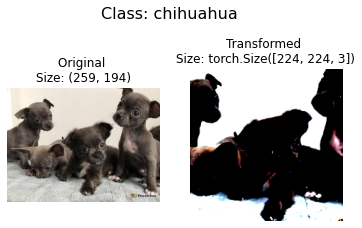

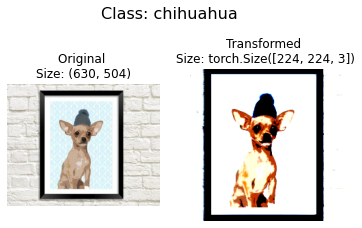

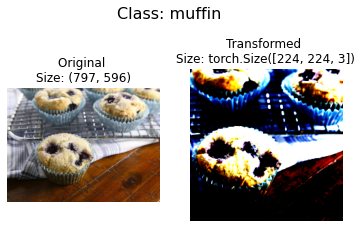

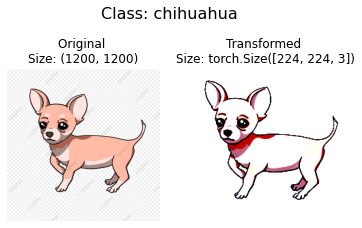

In [47]:
plot_transformed_images(df, transform = preprocess_train, k = 4)

In [48]:
!pip install torchsummary

In [49]:
model = vgg16(pretrained=True)

print(model)
#freeze
for param in model.parameters():
    param.requires_grad = False

modelOutputFeats = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(nn.Linear(modelOutputFeats, 1),
                                    nn.Sigmoid())
model = model.to(DEVICE)

from torchsummary import summary
summary(model, input_size=(3, 224, 224),device=DEVICE)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [50]:
lossFunc = nn.BCELoss()

In [51]:
#opt = torch.optim.SGD(model.classifier[6].parameters(), lr=0.0001)
opt = torch.optim.SGD(model.classifier[6].parameters(), lr=0.001)

In [52]:
def train_fn(model_to_use, optimizer, loss_fn, dataloader, device):
    model_to_use.train()
    fin_loss = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        
        inputs, targets = data['img'].to(device), data['label'].to(device).to(torch.float)
        targets = targets.unsqueeze(1)
        
        outputs = model_to_use(inputs)

        loss = loss_fn(outputs, targets)
        fin_loss += loss.item()
        
        loss.backward()
        optimizer.step()
        #scheduler.step()

        fin_loss += loss.item()
        
    print('Loss: ',fin_loss / len(dataloader))

In [53]:
def valid_fn(model_to_use, dataloader, device, classes=('chihuahua','muffin'), threshold=0.5):
    
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    
    model_to_use.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in dataloader:
            
            inputs, targets = data['img'].to(device), data['label'].to(device).to(torch.float)
            targets = targets.unsqueeze(1)
            
            outputs = model_to_use(inputs)
            
            pred = (outputs > threshold).to(torch.int).to(device)
            
            total += targets.size(0)
            #print("OUTPUTS:",outputs)
            #print('PREDICTED:',predicted)
            #print('TARGET:', targets)
            #overall acc
            correct += (pred == targets).sum().item()
            
            #acc for each class
            for label, prediction in zip(targets, pred.view(-1)):
                label = label.to(dtype=torch.long, device=device)
                #print(prediction)
                if label == prediction:
                    correct_pred[classes[label]] += 1
                total_pred[classes[label]] += 1
    
    print(f'Total accuracy: {100 * correct / total} %')
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname} is {accuracy:.1f} %')

In [54]:
for epoch in range(5):
    train_fn(model, opt, lossFunc, train_loader, DEVICE)
    valid_fn(model, val_loader, DEVICE)

Loss:  0.5449756816835016
Total accuracy: 98.73310810810811 %
Accuracy for class: chihuahua is 98.8 %
Accuracy for class: muffin is 98.7 %
Loss:  0.23792683715755875
Total accuracy: 99.32432432432432 %
Accuracy for class: chihuahua is 99.5 %
Accuracy for class: muffin is 99.1 %
Loss:  0.17603501596966306
Total accuracy: 99.32432432432432 %
Accuracy for class: chihuahua is 99.5 %
Accuracy for class: muffin is 99.1 %
Loss:  0.14636178576462977
Total accuracy: 99.32432432432432 %
Accuracy for class: chihuahua is 99.5 %
Accuracy for class: muffin is 99.1 %
Loss:  0.12997049480878017
Total accuracy: 99.32432432432432 %
Accuracy for class: chihuahua is 99.5 %
Accuracy for class: muffin is 99.1 %
